In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import re
warnings.filterwarnings('ignore')

pd.options.display.max_rows = None #mostrar todas las filas del df
%matplotlib inline
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (20, 10)
sns.set(style="whitegrid") # seteando tipo de grid en seaborn
pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

dataframe = pd.read_csv('train.csv', encoding = "latin-1")
dataframe = dataframe.set_index("id")
dataframe.head()

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
hashtag_reg = re.compile(r'#\w+')
mencion_reg = re.compile(r'(^|\W)@([A-Za-z0-9_]+)(?![A-Za-z0-9_]*\\.)')

def buscar_menciones(x):
    coincidencias = re.findall(mencion_reg, x)
    menciones = ""
    for coincidencia in coincidencias:
        menciones += ", {}".format(coincidencia[1].lower())
    return menciones[2:]

def buscar_hashtags(x):
    coincidencias = re.findall(hashtag_reg, x)
    hashtags = ""
    for coincidencia in coincidencias:
        hashtags += ", {}".format(coincidencia.lower())
    return hashtags[2:]

df_menciones = dataframe.loc[dataframe["text"].str.contains(mencion_reg)]
df_menciones["menciones"] = df_menciones["text"].apply(lambda x: buscar_menciones(x))
df_menciones["cantidad"] = df_menciones["menciones"].apply(lambda x: x.count(",") + 1)
df_hashtags = dataframe.loc[dataframe["text"].str.contains(hashtag_reg)]
df_hashtags["hashtags"] = df_hashtags["text"].apply(lambda x: buscar_hashtags(x))
df_hashtags["cantidad"] = df_hashtags["hashtags"].apply(lambda x: x.count(",") + 1)

In [4]:
print("Tweets con menciones: " + str(len(df_menciones)))
print("Tweets con hashtags: " + str(len(df_hashtags)))

Tweets con menciones: 2003
Tweets con hashtags: 1744


In [5]:
df_targets = df_menciones.groupby("target").agg({"text":"count"}).join(df_hashtags.groupby("target").agg({"text": "count"}), on = "target", lsuffix = " menciones", rsuffix = " hashtags")
df_targets

,text menciones,text hashtags
target,,
0,1341,885
1,662,859


In [6]:
# Combinacion de hashtags mas usadas (No son muchas)
df_hashtags["hashtags"].value_counts().head()

#hot, #prebreak, #best    30
#news                     16
#gbbo                     12
#nowplaying               11
#hiroshima                 8
Name: hashtags, dtype: int64

In [7]:
# Busco los hashtags mas usados
hashtags = {}
for row in df_hashtags["hashtags"]:
    for hashtag in row.split(", "):
        if hashtag in hashtags:
            hashtags[hashtag] += 1
        else:
            hashtags[hashtag] = 1
            
{k: v for k, v in sorted(hashtags.items(), key=lambda item: -item[1])} # Los ordeno por cantidad de apariciones

{'#news': 76,
 '#hot': 31,
 '#prebreak': 30,
 '#best': 30,
 '#nowplaying': 23,
 '#islam': 23,
 '#hiroshima': 21,
 '#earthquake': 19,
 '#gbbo': 18,
 '#jobs': 14,
 '#job': 12,
 '#isis': 12,
 '#world': 11,
 '#japan': 11,
 '#hiring': 11,
 '#terrorism': 11,
 '#india': 10,
 '#bbc': 10,
 '#sismo': 10,
 '#yyc': 10,
 '#breaking': 9,
 '#rt': 9,
 '#worldnews': 9,
 '#directioners': 9,
 '#irandeal': 9,
 '#fashion': 9,
 '#emmerdale': 9,
 '#cnn': 9,
 '#abstorm': 9,
 '#fukushima': 9,
 '#nuclear': 9,
 '#disaster': 8,
 '#edm': 8,
 '#dnb': 8,
 '#beyhive': 8,
 '#handbag': 8,
 '#wildfire': 8,
 '#seattle': 8,
 '#genocide': 8,
 '#nursing': 8,
 '#dubstep': 7,
 '#trapmusic': 7,
 '#dance': 7,
 '#icesâ': 7,
 '#us': 7,
 '#mtvhottest': 7,
 '#tcot': 7,
 '#business': 7,
 '#mh370': 7,
 '#wx': 7,
 '#okwx': 7,
 '#animalrescue': 7,
 '#truth': 7,
 '#god': 7,
 '#quran': 7,
 '#lies': 7,
 '#armageddon': 6,
 '#kindle': 6,
 '#womens': 6,
 '#usa': 6,
 '#tech': 6,
 '#â': 6,
 '#course': 6,
 '#art': 6,
 '#photography': 6,
 '#rohi

Text(0, 0.5, '% Tweets')

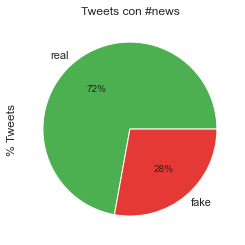

In [8]:
# Veo como se comportan los tweets con #news
df_news = df_hashtags.loc[df_hashtags["hashtags"].str.contains("#news")]
df_news["target"] = df_news["target"].apply(lambda x: "real" if x else "fake")
ax = df_news["target"].value_counts().plot.pie(colors = ["#4caf50", "#e53935"], autopct='%1.0f%%', title = "Tweets con #news")
ax.set_ylabel("% Tweets")

In [9]:
# Busco como se comporta en grupo (Siempre hay mas reales que falsos)
df_news = df_news.groupby(["cantidad", "target"]).agg({"hashtags": "count"}).unstack()
df_news.columns = df_news.columns.droplevel()

Text(0, 0.5, '# Tweets')

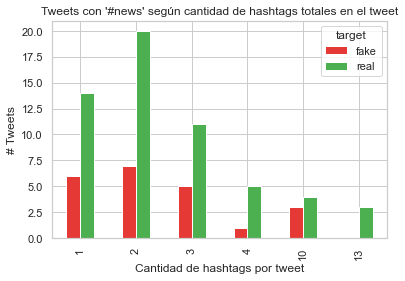

In [10]:
ax = df_news.plot.bar(colors = ["#e53935", "#4caf50"], title = "Tweets con '#news' según cantidad de hashtags totales en el tweet")
ax.set_xlabel("Cantidad de hashtags por tweet")
ax.set_ylabel("# Tweets")

In [11]:
# Combinacion de menciones mas usadas (No son muchas)
df_menciones["menciones"].value_counts().head()

youtube      62
change        9
usatoday      8
djicemoon     7
potus         6
Name: menciones, dtype: int64

In [12]:
# Busco las menciones mas usados
menciones = {}
for row in df_menciones["menciones"]:
    for mencion in row.split(", "):
        if mencion in menciones:
            menciones[mencion] += 1
        else:
            menciones[mencion] = 1
            
{k: v for k, v in sorted(menciones.items(), key=lambda item: -item[1])} # Las ordeno por cantidad de apariciones

{'youtube': 83,
 'arianagrande': 11,
 'potus': 9,
 'change': 9,
 'usatoday': 9,
 'foxnews': 9,
 'emmerdale': 8,
 'djicemoon': 7,
 'justinbieber': 7,
 'mikeparractor': 6,
 'stretcher': 6,
 'towel': 6,
 'viralspell': 5,
 'ap': 5,
 'usagov': 5,
 'youngheroesid': 5,
 'invalid': 5,
 'local_arsonist': 4,
 'lonewolffur': 4,
 'kurtschlichter': 4,
 'michael5sos': 4,
 'reuters': 4,
 'gop': 4,
 'realdonaldtrump': 4,
 'unsuckdcmetro': 4,
 'raynbowaffair': 4,
 'diamondkesawn': 4,
 'worldnetdaily': 4,
 'grazed': 4,
 'rexyy': 4,
 'trubgme': 3,
 'ebay': 3,
 'blizzard_draco': 3,
 'nbcnews': 3,
 'po_st': 3,
 'calum5sos': 3,
 'nytimes': 3,
 'weathernetwork': 3,
 'sharethis': 3,
 'guardian': 3,
 'jimmyfallon': 3,
 'claytonbryant': 3,
 'accionempresa': 3,
 'gerenciatodos': 3,
 'davidvonderhaar': 3,
 'yahoonews': 3,
 'tinyjecht': 3,
 'spinningbot': 3,
 'apollobrown': 3,
 'un': 3,
 'smh': 3,
 'refugees': 3,
 'tflbusalerts': 3,
 'mnpdnashville': 3,
 'ian_hellfire': 3,
 'barackobama': 3,
 'business': 3,
 'wire

Text(0, 0.5, '% Tweets')

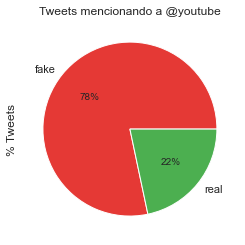

In [13]:
# Veo como se comportan los tweets con @youtube
df_youtube = df_menciones.loc[df_menciones["menciones"].str.contains("youtube")]
df_youtube["target"] = df_youtube["target"].apply(lambda x: "real" if x else "fake")
ax = df_youtube["target"].value_counts().plot.pie(colors = ["#e53935", "#4caf50"], autopct='%1.0f%%', title = "Tweets mencionando a @youtube")
ax.set_ylabel("% Tweets")

In [14]:
# Busco como se comporta en grupo (Siempre hay mas reales que falsos)
df_youtube = df_youtube.groupby(["cantidad", "target"]).agg({"menciones": "count"}).unstack()
df_youtube.columns = df_youtube.columns.droplevel()

Text(0, 0.5, '# Tweets')

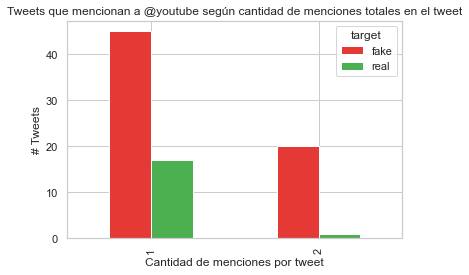

In [15]:
ax = df_youtube.plot.bar(colors = ["#e53935", "#4caf50"], title = "Tweets que mencionan a @youtube según cantidad de menciones totales en el tweet")
ax.set_xlabel("Cantidad de menciones por tweet")
ax.set_ylabel("# Tweets")

In [16]:
# Analizamos el uso de mayusculas
mayus_reg = re.compile(r'[A-Z]{2,}')

def buscar_mayus(x):
    coincidencias = re.findall(mayus_reg, x)
    palabras = ""
    for coincidencia in coincidencias:
        palabras += ", {}".format(coincidencia)
    return palabras[2:]

df_mayus = dataframe.loc[dataframe["text"].str.contains(mayus_reg)]
df_mayus["mayus"] = df_mayus["text"].apply(lambda x: buscar_mayus(x))
df_mayus["cantidad"] = df_mayus["mayus"].apply(lambda x: x.count(",") + 1)

In [17]:
# Busco las menciones mas usados
palabras = {}
for row in df_mayus["mayus"]:
    for palabra in row.split(", "):
        if palabra in palabras:
            palabras[palabra] += 1
        else:
            palabras[palabra] = 1
            
{k: v for k, v in sorted(palabras.items(), key=lambda item: -item[1])} # Las ordeno por cantidad de apariciones

{'RT': 116,
 'THE': 87,
 'PM': 81,
 'MH': 79,
 'US': 66,
 'IN': 44,
 'OF': 41,
 'IS': 39,
 'AND': 38,
 'OK': 31,
 'MY': 31,
 'PKK': 31,
 'VIDEO': 30,
 'USA': 29,
 'UK': 29,
 'ABC': 29,
 'TV': 28,
 'ISIS': 28,
 'MP': 27,
 'YOU': 25,
 'AM': 24,
 'TO': 24,
 'UTC': 24,
 'NC': 23,
 'CA': 22,
 'AT': 22,
 'IT': 22,
 'NOT': 22,
 'AP': 21,
 'FOR': 20,
 'ID': 20,
 'SO': 20,
 'SCREAMING': 20,
 'THIS': 20,
 'NWS': 20,
 'ON': 19,
 'IM': 19,
 'GBBO': 19,
 'BBC': 19,
 'CNN': 19,
 'LA': 18,
 'DC': 18,
 'II': 18,
 'EP': 17,
 'ME': 17,
 'PS': 17,
 'ST': 16,
 'NEW': 16,
 'DR': 15,
 'OMG': 15,
 'NY': 15,
 'NOW': 15,
 'POTUS': 15,
 'GOP': 15,
 'UPDATE': 15,
 'MD': 15,
 'RN': 15,
 'CDT': 15,
 'BREAKING': 14,
 'SW': 14,
 'BE': 14,
 'AB': 14,
 'PP': 14,
 'DO': 13,
 'FB': 13,
 'UD': 13,
 'WW': 13,
 'MS': 13,
 'KS': 13,
 'UP': 13,
 'BB': 13,
 'LED': 13,
 'APC': 13,
 'NO': 12,
 'ALL': 12,
 'GO': 12,
 'SOS': 12,
 'MT': 12,
 'ND': 12,
 'NS': 11,
 'OR': 11,
 'TH': 11,
 'OH': 11,
 'RE': 11,
 'NP': 11,
 'BP': 11,
 'G

Text(0, 0.5, '% Tweets')

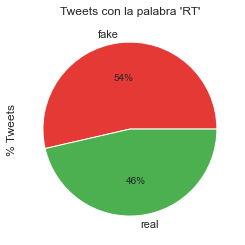

In [18]:
# Distribucion de "RT"
df_RT = df_mayus.loc[df_mayus["text"].str.contains("RT")]
df_RT["target"] = df_RT["target"].apply(lambda x: "real" if x else "fake")
ax = df_RT["target"].value_counts().plot.pie(colors = ["#e53935", "#4caf50"], autopct='%1.0f%%', title = "Tweets con la palabra 'RT'")
ax.set_ylabel("% Tweets")

Text(0.5, 0, 'Cantidad de palabras mayúsculas')

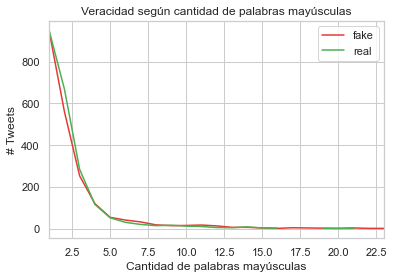

In [19]:
# Segun cantidad de palabras mayusculas en el tweet
aux = df_mayus.groupby(["cantidad", "target"]).agg({"mayus": "count"}).unstack(level = "target")
aux.columns = ["fake", "real"]
ax = aux.plot(colors = ["#e53935", "#4caf50"], title = "Veracidad según cantidad de palabras mayúsculas")
ax.set_ylabel("# Tweets")
ax.set_xlabel("Cantidad de palabras mayúsculas")

Text(0, 0.5, '# Tweets')

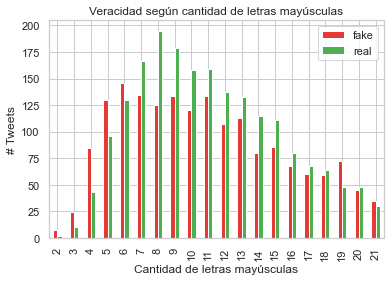

In [22]:
# Segun cantidad de letras mayusculas

mayus_reg = re.compile(r'[A-Z]')
def contar_mayus(x):
    coincidencias = re.findall(mayus_reg, x)
    return len(coincidencias)

df_mayus["cantidad letras mayusculas"] = df_mayus["text"].apply(lambda x: contar_mayus(x))
df_cantidad_mayus = df_mayus.groupby(["cantidad letras mayusculas", "target"]).agg({"mayus": "count"})

df_cantidad_mayus = df_cantidad_mayus.unstack()
df_cantidad_mayus.columns = df_cantidad_mayus.columns.droplevel()
df_cantidad_mayus.columns = ["fake", "real"]

ax = df_cantidad_mayus.head(20).plot.bar(colors = ["#e53935", "#4caf50"], title = "Veracidad según cantidad de letras mayúsculas")
ax.set_xlabel("Cantidad de letras mayúsculas")
ax.set_ylabel("# Tweets")